In [1]:
from dataloader import *
from models import *
from trainer import *
from evaluator import *
import json

In [3]:
with open('./config.json', 'r') as f:
    config = json.load(f)

data_path = config['data_path']
weights_path = config['weights_path']
prediction_path = config['prediction_path']

model_types = config['model_types']
tissue = config['tissue']
histones = config['histones']

batch_size = config['batch_size']
num_epochs = config['num_epochs']
lr = config['lr']
earlystop_thresh = config['earlystop_thresh']

# binary

In [4]:
data = MyDataset(data_path,tissue,histones, batch_size)

In [5]:
model = Deep5hmC_binary(input_read_size=data.read_size)

In [6]:
trainer = Trainer(weights_path = weights_path, tissue = tissue, num_epochs=num_epochs, lr=lr, earlystop_thresh=earlystop_thresh)

In [7]:
trainer.fit(model = model, data = data, model_type = model_types[0])

[INFO] using GPU
[INFO] training the network...
[INFO] EPOCH: 1/5
Train loss: 0.689402
Train accuracy: 0.5384
Val loss: 0.722762
Val accuracy: 0.5970

[INFO] total time taken to train the model: 68.96s


In [8]:
evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = trainer.best_model)
#evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = f'../pretrained/Deep5hmC_binary.pth')

[INFO] resume best model...


[INFO] evaluating network...
Test: acc 0.810, auroc 0.908, auprc 0.899, f1 0.798, precision 0.755, recall 0.847, R 0.707



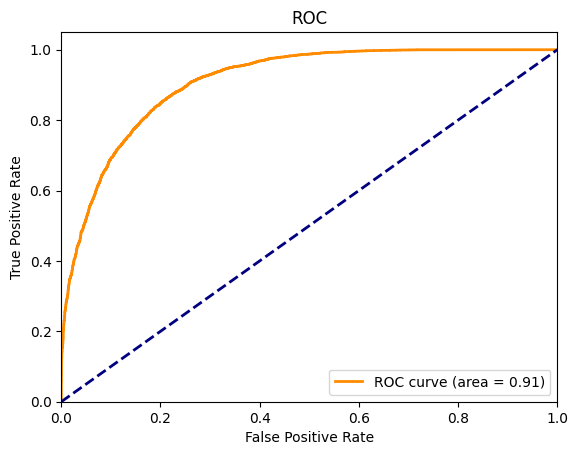

[0.81, 0.908, 0.899, 0.798, 0.755, 0.847, 0.707]

In [9]:
evaluator.eval_model(data, model_type = model_types[0], verbose=1)

# continuous

In [10]:
data = MyDataset(data_path,tissue,histones, batch_size)

In [11]:
model = Deep5hmC_cont(input_read_size=data.read_size)

In [12]:
trainer = Trainer(weights_path = weights_path, tissue = tissue, num_epochs=num_epochs, lr=lr, earlystop_thresh=earlystop_thresh)

In [13]:
trainer.fit(model = model, data = data, model_type = model_types[1])

[INFO] using GPU
[INFO] training the network...
[INFO] EPOCH: 1/5
Train loss: 4.620270
Val loss: 17.330780
[INFO] total time taken to train the model: 43.74s


In [14]:
evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = trainer.best_model)
#evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = f'../pretrained/Deep5hmC_cont.pth')

[INFO] resume best model...


In [15]:
evaluator.eval_model(data, model_type = model_types[1], verbose=1)

[INFO] evaluating network...
Test: MSE 13.714, R 0.760



(13.714, 0.76)